In [119]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from dateutil.parser import parse
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import time

dates = []
DAtes=[]
prices = []

def get_data(filename):
    with open(filename, 'r') as csvFile:
        csvFileReader = csv.reader(csvFile)
        start_time = time.time()
        next(csvFileReader)
        for row in csvFileReader:
            dt = parse(row[0])
            dates.append(dt.strftime('%d%m%Y'))
            prices.append(float(row[1]))         #Open Value considered 
        print("---- Completed reading file : %s in %s seconds ---" % (filename,time.time() - start_time))
    #print(prices)
    dates2=np.array(dates)
    prices2=np.array(prices)
    return dates2,prices2

def get_onehotlabelsarray(dates): 
    enc = OneHotEncoder()
    enc.fit(dates) 
    OneHotEncoder(categorical_features='all',handle_unknown='error', n_values='auto', sparse=True)
    onehotlabels = enc.transform(dates).toarray()
    print(onehotlabels)
    return onehotlabels

def get_onehot_singledate(dates,st):
    enc=OneHotEncoder()
    enc.fit(np.array(dates).reshape(-1,1))
    OneHotEncoder(categorical_features='all',handle_unknown='error', n_values='auto', sparse=True)
    encodedlabel = enc.transform(np.array([st]).reshape(-1,1)).toarray()
    print(encodedlabel)
    return encodedlabel

def predict_prices(dates, prices, x,dates_nonencoded):
    svr_lin = SVR(kernel = 'linear', C=1e3)
    svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.1)
    
    start_time = time.time()
    svr_lin.fit(dates,prices)
    print("--- Linear Fit Complete in %s seconds ---" % (time.time() - start_time))
    print("\n")
    
    # The Polynomial fitting did not complete within a reasonable time, therefore commenting it out.
    # svr_poly.fit(dates,prices)
    # print("Polynomial Fit Complete")
    start_time = time.time()
    svr_rbf.fit(dates,prices)
    print("--- RBF Fit Complete in %s seconds ---" % (time.time() - start_time))
    print("\n")

    #print(prices)
    #print(dates)

    dt = parse(x)
    pp=get_onehot_singledate(dates_nonencoded,str(dt.strftime('%d%m%Y')))
    pp.reshape(1,-1)
    print(pp.shape)
    
    rbf_prediction = svr_rbf.predict(pp)
    linear_prediction = svr_lin.predict(pp)

    prices_rbf=svr_rbf.predict(dates)
    prices_lin=svr_lin.predict(dates)
    
    print("RBF Prediction is : ",rbf_prediction)
    print("\n")
    print("Linear Prediction is : ",linear_prediction)
    
    print(dates_nonencoded.shape)
    print(prices.shape)
    print(prices_rbf.shape)
    print(prices_lin.shape)

    plt.scatter(dates_nonencoded.tolist(),prices.tolist(),color='black', label='Data')
    plt.plot(dates_nonencoded.tolist(),prices_rbf.tolist(), color = 'red', label = 'RBF model')
    plt.plot(dates_nonencoded.tolist(),prices_lin.tolist(), color = 'blue', label = 'Linear model')
    # plt.plot(dates,svr_poly.predict(dates), color = 'red', label = 'Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()


---- Completed reading file : ge.csv in 0.02369213104248047 seconds ---
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--- Linear Fit Complete in 0.02392721176147461 seconds ---


--- RBF Fit Complete in 0.025661945343017578 seconds ---


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

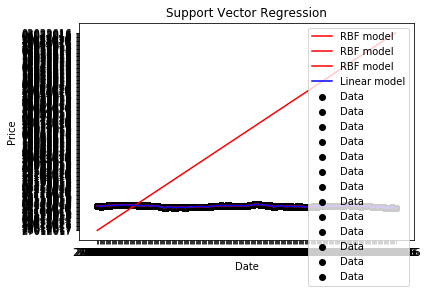

In [120]:

dates,prices=get_data('ge.csv')
#datesarr=np.array(dates)
datesarr=np.reshape(dates,(-1,1))
datesarr=get_onehotlabels(datesarr)

dates=dates.reshape(-1)

predict_prices(datesarr,prices,'28/01/2017',dates)